In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df=pd.read_csv(r"Carros Usados.csv")
pd.set_option('display.max_columns', None)
df.head()

,listing_id,make,model,year,trim,body_type,fuel_type,transmission,mileage,price,condition,seller_type,city,state,country,Adaptive Cruise Control,Alloy Wheels,Android Auto,Apple CarPlay,Backup Camera,Blind Spot Monitor,Bluetooth,Fog Lights,Heated Seats,Keyless Entry,LED Headlights,Lane Keep Assist,Leather Seats,Navigation,Panoramic Roof,Parking Sensors,Push Button Start,Sunroof,Ventilated Seats,Wireless Charging
0,1,Tesla,Model 3,2019,NaN,Coupe,Electric,Manual,46134,19919,good,Dealer,New Lindsey,GA,US,False,True,True,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
1,2,Nissan,Rogue,2024,LT,Sedan,Hybrid,Automatic,16109,19480,good,Dealer,Pughtown,CO,US,False,True,True,False,False,False,False,False,False,False,False,True,False,True,True,True,True,False,False,True
2,3,Hyundai,i20,2018,XLE,Crossover,Petrol,Automatic,173239,4556,good,Dealer,Satna,HR,India,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False
3,4,Kia,Sportage,2023,EX,Hatchback,Diesel,CVT,36810,11536,fair,Certified Pre-Owned,山武市,Osaka,Japan,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True
4,5,Kia,Seltos,2020,Trend,Pickup,Diesel,Automatic,87749,14098,good,Certified Pre-Owned,長生郡長生村,Osaka,Japan,False,False,False,True,True,False,True,False,True,False,False,True,False,False,True,False,True,False,False,True


In [63]:
montadora_media_preco = df.groupby("make", as_index=False)["price"].mean()
montadora_media_preco=montadora_media_preco.sort_values("price", ascending=False)

In [64]:
import seaborn as sns

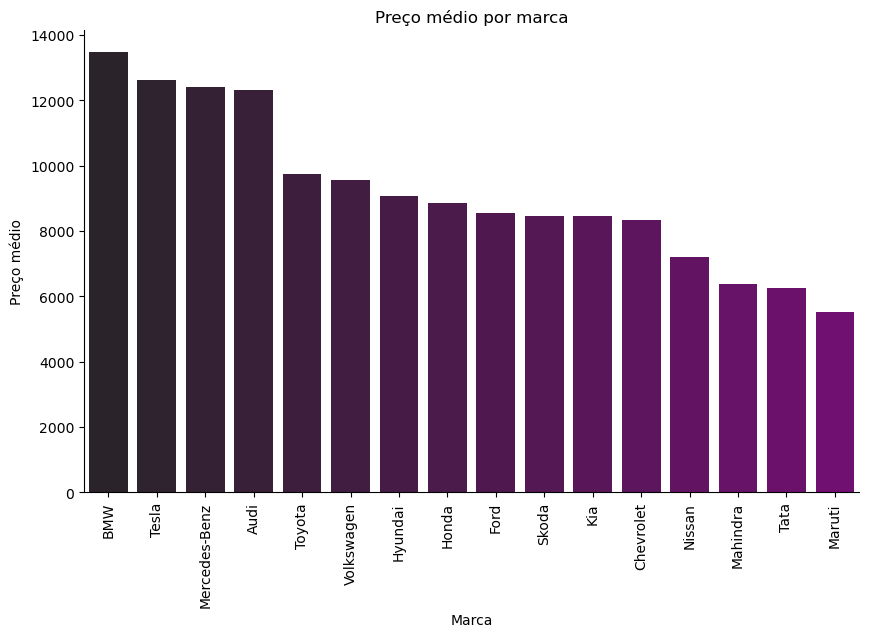

In [65]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(
    data=montadora_media_preco,
    x="make",
    y="price",
    hue="make",      
    dodge=False,     
    palette='dark:purple',
    legend=False     
)
ax.set_facecolor("none") 
fig.patch.set_facecolor("none")  


sns.despine(ax=ax)


ax.set_title("Preço médio por marca")
ax.set_xlabel("Marca")
ax.set_ylabel("Preço médio")
plt.xticks(rotation=90)

plt.show()

#st.pyplot(fig, transparent=True)

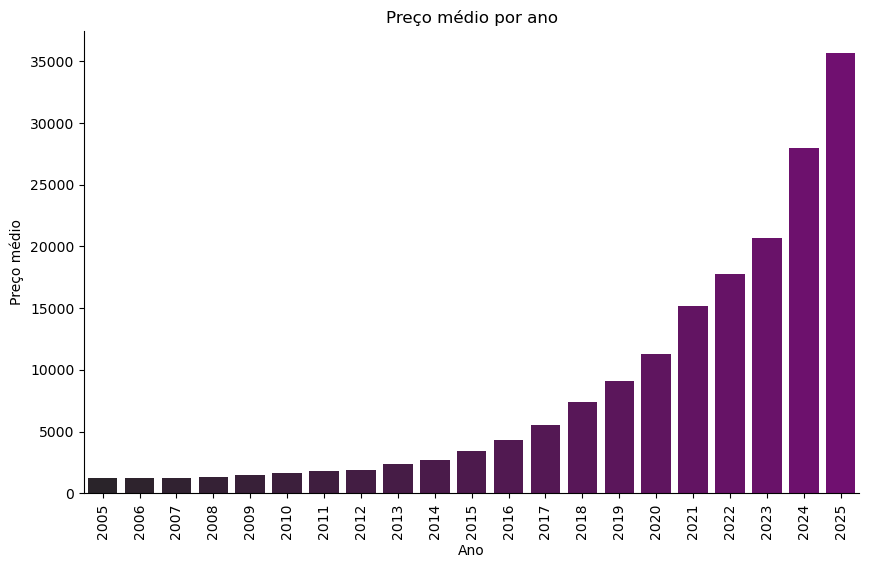

In [66]:
ano_media_preco = df.groupby("year", as_index=False)["price"].mean()


fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(
    data=ano_media_preco,
    x="year",
    y="price",
    hue="year",      
    dodge=False,     
    palette='dark:purple',
    legend=False     
)
ax.set_facecolor("none") 
fig.patch.set_facecolor("none")  


sns.despine(ax=ax)


ax.set_title("Preço médio por ano")
ax.set_xlabel("Ano")
ax.set_ylabel("Preço médio")
plt.xticks(rotation=90)

plt.show()

#st.pyplot(fig, transparent=True)

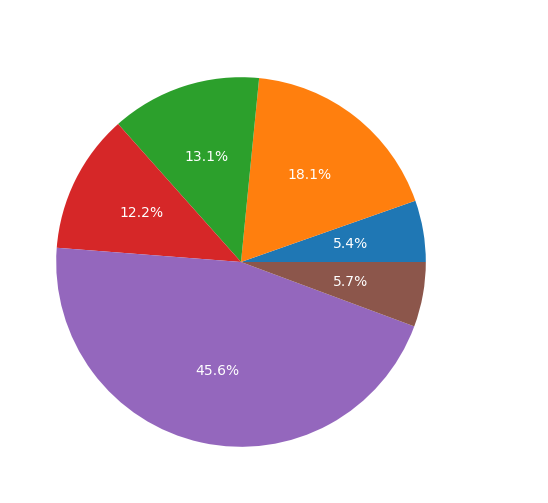

In [67]:
fuel_price = df.groupby("fuel_type")["price"].sum()

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    fuel_price,
    labels=fuel_price.index,
    autopct="%1.1f%%",
    
    textprops={"color": "white"}  
)

ax.set_title("Proporção do preço por tipo de combustível", color="white")


fig.patch.set_facecolor("none")
ax.set_facecolor("none")

plt.show()
# st.pyplot(fig, transparent=True)

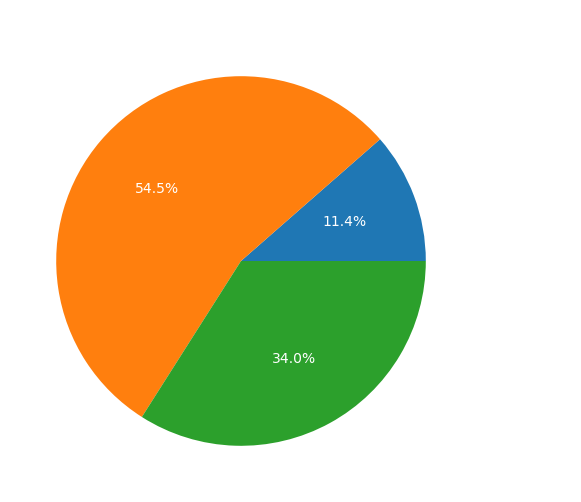

In [68]:
seller_price = df.groupby("seller_type")["price"].sum()

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    seller_price,
    labels=seller_price.index,
    autopct="%1.1f%%",
    
    textprops={"color": "white"}  
)

ax.set_title("Proporção do preço por tipo de Venda", color="white")


fig.patch.set_facecolor("none")
ax.set_facecolor("none")

plt.show()
# st.pyplot(fig, transparent=True)

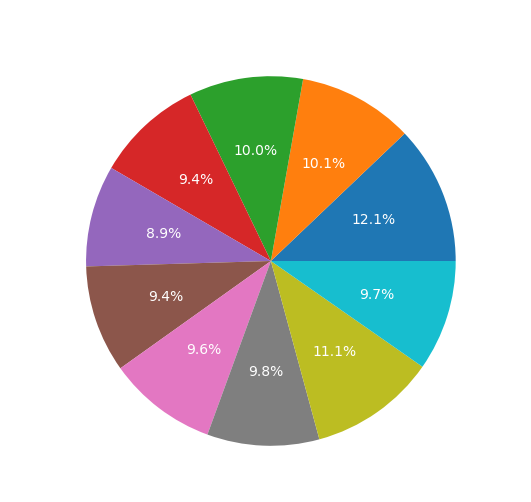

In [69]:
seller_price = df.groupby("country")["price"].sum()

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    seller_price,
    labels=seller_price.index,
    autopct="%1.1f%%",
    
    textprops={"color": "white"}  
)

ax.set_title("Proporção do preço por tipo de Venda", color="white")


fig.patch.set_facecolor("none")
ax.set_facecolor("none")

plt.show()
# st.pyplot(fig, transparent=True)

In [70]:
feature_cols = df.columns[15:]  # features start at column 14
df[feature_cols] = df[feature_cols].astype(bool)

# Now you can safely count features
feature_counts = df[feature_cols].sum().sort_values(ascending=False)
print(feature_counts)

Android Auto               649
Fog Lights                 643
Wireless Charging          642
Leather Seats              640
Backup Camera              639
Heated Seats               638
Sunroof                    638
Alloy Wheels               636
Navigation                 633
Panoramic Roof             632
Ventilated Seats           630
Push Button Start          626
Apple CarPlay              625
Parking Sensors            622
Adaptive Cruise Control    611
LED Headlights             608
Bluetooth                  600
Lane Keep Assist           599
Keyless Entry              589
Blind Spot Monitor         585
dtype: int64


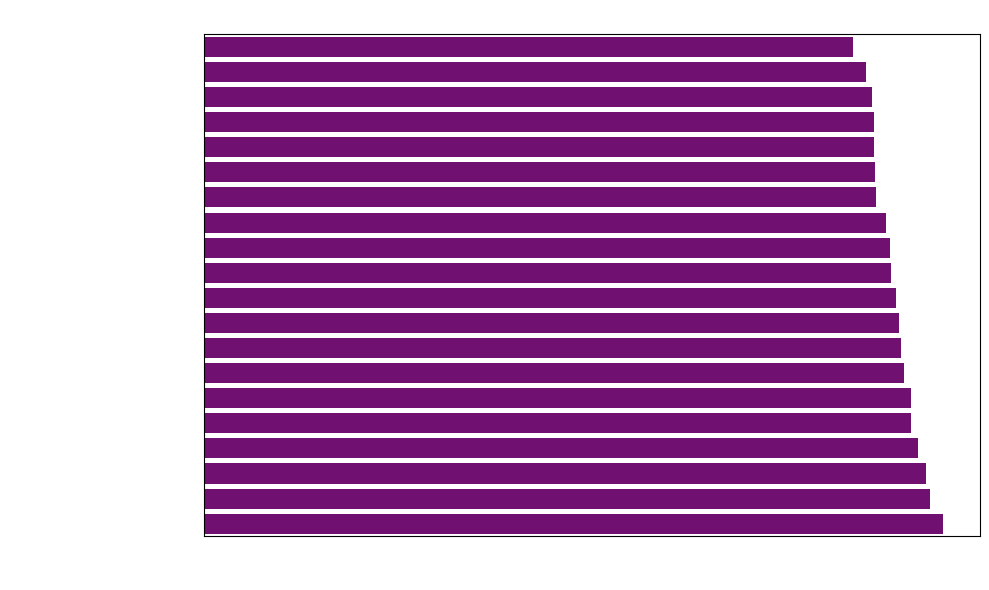

In [71]:
avg_price_features = {
    col: df.loc[df[col], "price"].mean() 
    for col in feature_cols
}
avg_price_features = pd.Series(avg_price_features).sort_values(ascending=True)


plt.figure(figsize=(10, 6), facecolor="none")
sns.barplot(
    x=avg_price_features.values,
    y=avg_price_features.index,

    
    color="purple",
     edgecolor="none",     
    dodge=False,          
    legend=False,
    
)
plt.gcf().patch.set_alpha(0.0)
plt.gca().set_facecolor("none")


plt.title("Média de preço por características", fontsize=14, weight="bold", color="white")
plt.xlabel("Média de Preço (USD)", color="white")
plt.ylabel("característica", color="white")


plt.gca().tick_params(colors="white")

plt.tight_layout()
plt.show()
# st.pyplot(fig, transparent=True)

In [72]:
import plotly.express as px

In [75]:
 df['country'].value_counts()
country_mapping = {
    "US": "United States",
    "UK": "United Kingdom"
}

df['country'] = df['country'].map(lambda x: country_mapping.get(x, x))

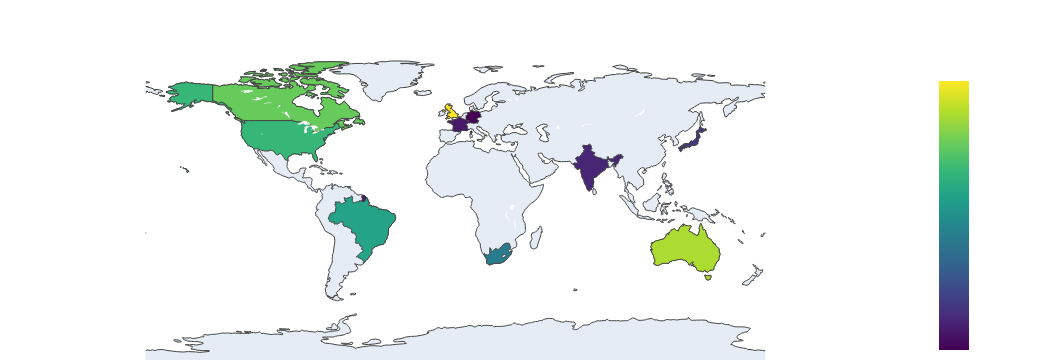

In [82]:
country_avg = df.groupby('country').agg({'price':'mean'}).reset_index()

# Create choropleth map
fig = px.choropleth(
    country_avg,
    locations='country',        
    locationmode='country names',  
    color='price',              
    color_continuous_scale='Viridis',
    title='Média de preço dos carros por País',
    labels={'price':'Média de Preço'}
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        bgcolor='rgba(0,0,0,0)'   
    ),
    paper_bgcolor='rgba(0,0,0,0)',  
    plot_bgcolor='rgba(0,0,0,0)',   
    font=dict(color='white'),        
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()
#st.plotly_chart(fig, use_container_width=True)